In [1]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [2]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df6 = pd.read_excel(data_path, sheet_name=6)


## Classification of Healthy plants vs Unhealthy plants

## SMOTE

In [3]:
# Make a new column 'Health_Status'
df = df6.copy()

# Drop the 'Planta ' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.083593,0.079905,0.073394,0.075047,0.075460,0.071963,0.067658,0.063830,...,0.043526,0.043383,0.043299,0.043140,0.042942,0.042792,0.042597,0.042495,0.042533,0.042366
1,Control,1,0.071070,0.072514,0.071582,0.067428,0.067762,0.070967,0.068883,0.060744,...,0.039703,0.039451,0.039231,0.039009,0.038669,0.038516,0.038531,0.038407,0.038301,0.038193
2,Control,1,0.081492,0.082492,0.077754,0.078853,0.078830,0.076013,0.073081,0.067915,...,0.040540,0.040350,0.040093,0.039953,0.039855,0.039817,0.039920,0.039867,0.039833,0.039683
3,Control,1,0.077857,0.078985,0.075893,0.076726,0.074149,0.068599,0.066066,0.060931,...,0.038619,0.038488,0.038312,0.038166,0.038039,0.037927,0.037774,0.037709,0.037737,0.037672
4,Control,1,0.080690,0.082747,0.075338,0.075074,0.076218,0.076180,0.075103,0.065609,...,0.038107,0.037915,0.037727,0.037579,0.037529,0.037438,0.037346,0.037240,0.037149,0.037054


In [4]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    198
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    198
0    198
Name: count, dtype: int64

Original shape: (228, 2151), Balanced shape: (396, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_15564\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.083593,0.079905,0.073394,0.075047,0.075460,0.071963,0.067658,0.063830,0.061430,...,0.043526,0.043383,0.043299,0.043140,0.042942,0.042792,0.042597,0.042495,0.042533,0.042366
1,1,0.071070,0.072514,0.071582,0.067428,0.067762,0.070967,0.068883,0.060744,0.054295,...,0.039703,0.039451,0.039231,0.039009,0.038669,0.038516,0.038531,0.038407,0.038301,0.038193
2,1,0.081492,0.082492,0.077754,0.078853,0.078830,0.076013,0.073081,0.067915,0.065124,...,0.040540,0.040350,0.040093,0.039953,0.039855,0.039817,0.039920,0.039867,0.039833,0.039683
3,1,0.077857,0.078985,0.075893,0.076726,0.074149,0.068599,0.066066,0.060931,0.058871,...,0.038619,0.038488,0.038312,0.038166,0.038039,0.037927,0.037774,0.037709,0.037737,0.037672
4,1,0.080690,0.082747,0.075338,0.075074,0.076218,0.076180,0.075103,0.065609,0.058789,...,0.038107,0.037915,0.037727,0.037579,0.037529,0.037438,0.037346,0.037240,0.037149,0.037054


In [5]:
# Add a column to distinguish between data before and after balancing
# Mark original data
n_original = len(df)
n_synthetic = len(df_balanced) - n_original

# Create status array: first n_original are 'Original', rest are 'Balanced'
data_status = ['Original'] * n_original + ['Balanced'] * n_synthetic
df_balanced.insert(0, 'Data_Status', data_status)
df_balanced.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_15564\56007382.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Data_Status', data_status)


,Data_Status,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Original,1,0.083593,0.079905,0.073394,0.075047,0.075460,0.071963,0.067658,0.063830,...,0.043526,0.043383,0.043299,0.043140,0.042942,0.042792,0.042597,0.042495,0.042533,0.042366
1,Original,1,0.071070,0.072514,0.071582,0.067428,0.067762,0.070967,0.068883,0.060744,...,0.039703,0.039451,0.039231,0.039009,0.038669,0.038516,0.038531,0.038407,0.038301,0.038193
2,Original,1,0.081492,0.082492,0.077754,0.078853,0.078830,0.076013,0.073081,0.067915,...,0.040540,0.040350,0.040093,0.039953,0.039855,0.039817,0.039920,0.039867,0.039833,0.039683
3,Original,1,0.077857,0.078985,0.075893,0.076726,0.074149,0.068599,0.066066,0.060931,...,0.038619,0.038488,0.038312,0.038166,0.038039,0.037927,0.037774,0.037709,0.037737,0.037672
4,Original,1,0.080690,0.082747,0.075338,0.075074,0.076218,0.076180,0.075103,0.065609,...,0.038107,0.037915,0.037727,0.037579,0.037529,0.037438,0.037346,0.037240,0.037149,0.037054


In [6]:
# data treatment

# Data preparation for model production
df_X = df_balanced.drop(columns=['Sana', 'Data_Status'])

X = df_X.values  
y = df_balanced['Sana'].values
data_status = df_balanced['Data_Status'].values  # Keep track of data origin

#split the data into training and testing sets
X_train, X_test, y_train, y_test, status_train, status_test = train_test_split(
    X, y, data_status, test_size=0.3, random_state=42, stratify=y
)

# Print distribution
print(f"Test set distribution:")
print(f"Original samples: {sum(status_test == 'Original')}")
print(f"Balanced samples: {sum(status_test == 'Balanced')}")

Test set distribution:
Original samples: 66
Balanced samples: 53


## Logistic Regression

In [7]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    },
    # L2 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'lbfgs'],
        'model__class_weight': [None, 'balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': [None, 'balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.680672268907563
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.48      0.60        60
           1       0.63      0.88      0.73        59

    accuracy                           0.68       119
   macro avg       0.72      0.68      0.67       119
weighted avg       0.72      0.68      0.67       119



In [8]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 0.001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'saga'}


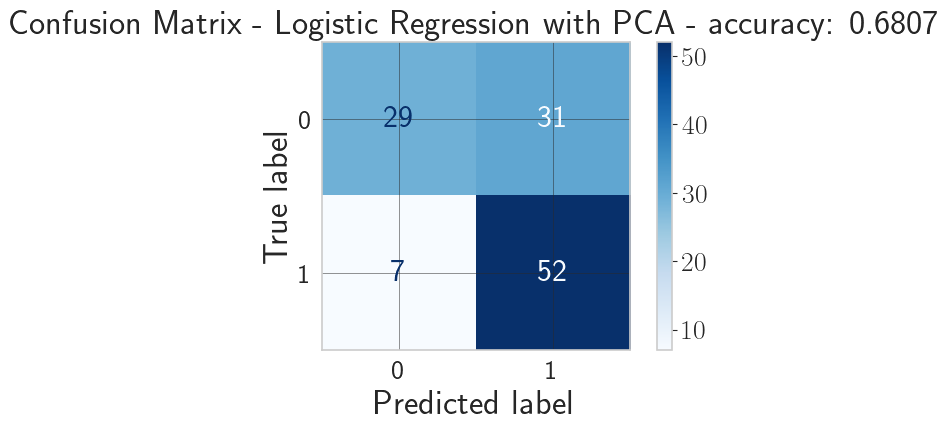

In [9]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()

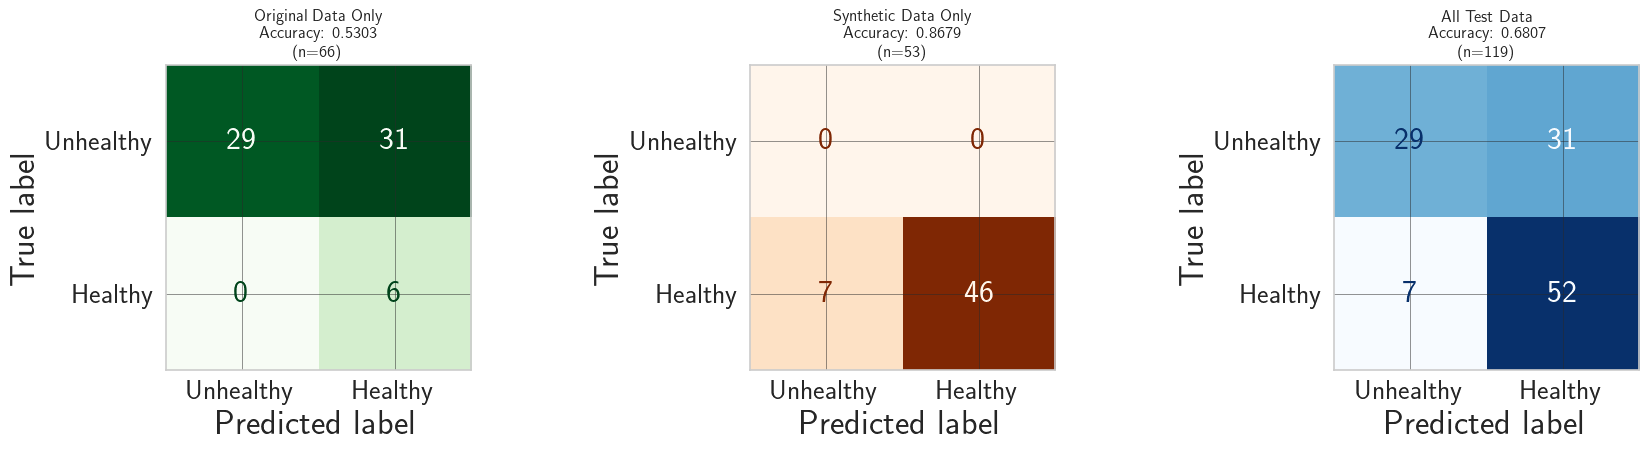

In [10]:
# Detailed analysis of predictions by data origin
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Separate predictions by data origin
original_mask = status_test == 'Original'
balanced_mask = status_test == 'Balanced'

# Calculate metrics for original data
y_test_original = y_test[original_mask]
y_pred_original = y_pred_best[original_mask]

# Calculate metrics for balanced data
y_test_balanced = y_test[balanced_mask]
y_pred_balanced = y_pred_best[balanced_mask]

# Create confusion matrices
cm_original = confusion_matrix(y_test_original, y_pred_original)
cm_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
cm_total = confusion_matrix(y_test, y_pred_best)

# Calculate accuracies
acc_original = accuracy_score(y_test_original, y_pred_original)
acc_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
acc_total = accuracy_score(y_test, y_pred_best)

# Create figure with subplots
fig = plt.figure(figsize=(18, 5))
gs = GridSpec(1, 3, figure=fig)

# Plot 1: Original data confusion matrix
ax1 = fig.add_subplot(gs[0, 0])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_original, display_labels=['Unhealthy', 'Healthy'])
disp1.plot(cmap='Greens', ax=ax1, colorbar=False)
ax1.set_title(f'Original Data Only\nAccuracy: {acc_original:.4f}\n(n={sum(original_mask)})', fontsize=12)

# Plot 2: Balanced (synthetic) data confusion matrix
ax2 = fig.add_subplot(gs[0, 1])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=['Unhealthy', 'Healthy'])
disp2.plot(cmap='Oranges', ax=ax2, colorbar=False)
ax2.set_title(f'Synthetic Data Only\nAccuracy: {acc_balanced:.4f}\n(n={sum(balanced_mask)})', fontsize=12)

# Plot 3: Total confusion matrix
ax3 = fig.add_subplot(gs[0, 2])
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_total, display_labels=['Unhealthy', 'Healthy'])
disp3.plot(cmap='Blues', ax=ax3, colorbar=False)
ax3.set_title(f'All Test Data\nAccuracy: {acc_total:.4f}\n(n={len(y_test)})', fontsize=12)

plt.tight_layout()
plt.show()